# BANK LOAN ANALYSIS REPORT

In [5]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
df =pd.read_excel("C:/Users/SRINJOY ADHIKARY/Downloads/financial_loan.xlsx")

In [7]:
df.head()


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Metadata of Data

In [9]:
print("no. of rows", df.shape[0])


no. of rows 38576


In [10]:
print("no. of columns", df.shape[1])


no. of columns 24


In [11]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

## Data Types

In [12]:
df.dtypes


id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

## Basic Statistical Summary

In [14]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total Loan Applications

In [15]:
total_loan_app=df['id'].count()
print ("Total Loan Applications=",total_loan_app)

Total Loan Applications= 38576


### MTD Loan Applications

In [23]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]
mtd_loan_app=mtd_data['id'].count()
print(f"MTD Loan Applications (for {latest_issue_date.strftime ('%B %Y')}):{mtd_loan_app}")

MTD Loan Applications (for December 2021):4314


### Total Funded Amount

In [29]:
total_funded_amt=df['loan_amount'].sum()
total_funded_amt_mill=total_funded_amt/1000000
print("Total Funded Amount: ${:.2f} M".format (total_funded_amt_mill))

Total Funded Amount: $435.76 M


### MTD Funded Amount

In [31]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]
mtd_total_funded_loanamt=(mtd_data['loan_amount'].sum())/1000000
print("Total MTD Funded Amount: ${:.2f} M".format(mtd_total_funded_loanamt))

Total MTD Funded Amount: $53.98 M


### Total Amount Recieved

In [32]:
total_payment_amt=df['total_payment'].sum()
total_payment_amt_mill=total_payment_amt/1000000
print("Total  Amount Recieved: ${:.2f} M".format (total_payment_amt_mill))

Total  Amount Recieved: $473.07 M


### MTD Amount Recieved

In [33]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]
mtd_amount_recieved=(mtd_data['total_payment'].sum())/1000000
print("Total MTD Amount Recieved: ${:.2f} M".format(mtd_amount_recieved))

Total MTD Amount Recieved: $58.07 M


### Average Interest Rate



In [43]:
average_interest_rate=df['int_rate'].mean()*100
print("Average Interest Rate:{:.2f}%".format(average_interest_rate))

Average Interest Rate:12.05%


### Average Debt To Income Ratio

In [46]:
average_dti=df['dti'].mean()*100
print("Average DTI:{:.2f}".format(average_dti))

Average DTI:13.33


### Good Loan Metrics

In [50]:
good_loans=df[df['loan_status'].isin(["Fully Paid","Current"])]
total_loan_applications=df['id'].count()
good_loans_applications=good_loans['id'].count()
good_loan_funded_amt=(good_loans['loan_amount'].sum())/1000000
good_loans_total_payment=(good_loans['total_payment'].sum())/1000000
good_loans_percentage=(good_loans_applications/total_loan_applications)*100

print("Good Loans Applications",good_loans_applications)
print("Good Loans Funded Amount: ${:.2f} M".format(good_loan_funded_amt))
print("Good Loans Total Recieved: ${:.2f} M".format(good_loans_total_payment))
print("Good Loans Percentage: ${:.2f}%".format(good_loans_percentage))




Good Loans Applications 33243
Good Loans Funded Amount: $370.22 M
Good Loans Total Recieved: $435.79 M
Good Loans Percentage: $86.18%


### Bad Loan Metrics

In [51]:
bad_loans=df[df['loan_status'].isin(["Charged Off"])]
total_loan_applications=df['id'].count()
bad_loans_applications=bad_loans['id'].count()
bad_loan_funded_amt=(bad_loans['loan_amount'].sum())/1000000
bad_loans_total_payment=(bad_loans['total_payment'].sum())/1000000
bad_loans_percentage=(bad_loans_applications/total_loan_applications)*100

print("Bad Loans Applications",bad_loans_applications)
print("Bad Loans Funded Amount: ${:.2f} M".format(bad_loan_funded_amt))
print("Bad Loans Total Recieved: ${:.2f} M".format(bad_loans_total_payment))
print("Bad Loans Percentage: ${:.2f}%".format(bad_loans_percentage))

Bad Loans Applications 5333
Bad Loans Funded Amount: $65.53 M
Bad Loans Total Recieved: $37.28 M
Bad Loans Percentage: $13.82%


### Monthly Trends by Issue Date for Total Funded Amount

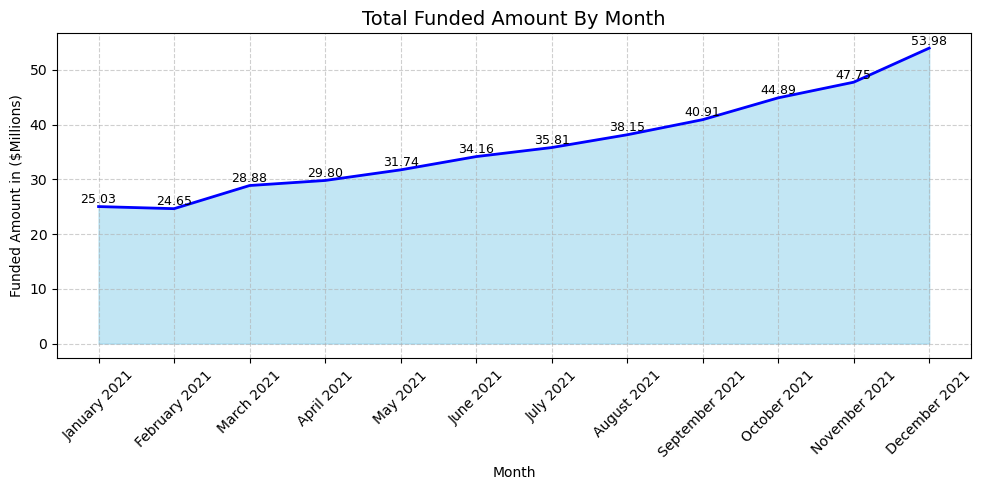

In [58]:
monthly_funded=(df.sort_values('issue_date').assign (month_name=lambda x:x['issue_date'].dt.strftime('%B %Y')) .groupby('month_name',sort=False)['loan_amount'].sum().div(1000000).reset_index(name='loan_amount_millions'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth=2)
for i,row in monthly_funded.iterrows():
     plt.text(i,row['loan_amount_millions']+0.1,f"{row['loan_amount_millions']:.2f}", ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total Funded Amount By Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount in ($Millions)')
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle= '--' ,alpha= 0.6)
plt.tight_layout()
plt.show()
     
  

### Monthly Trends By Issue Date for Total Payment Recieved


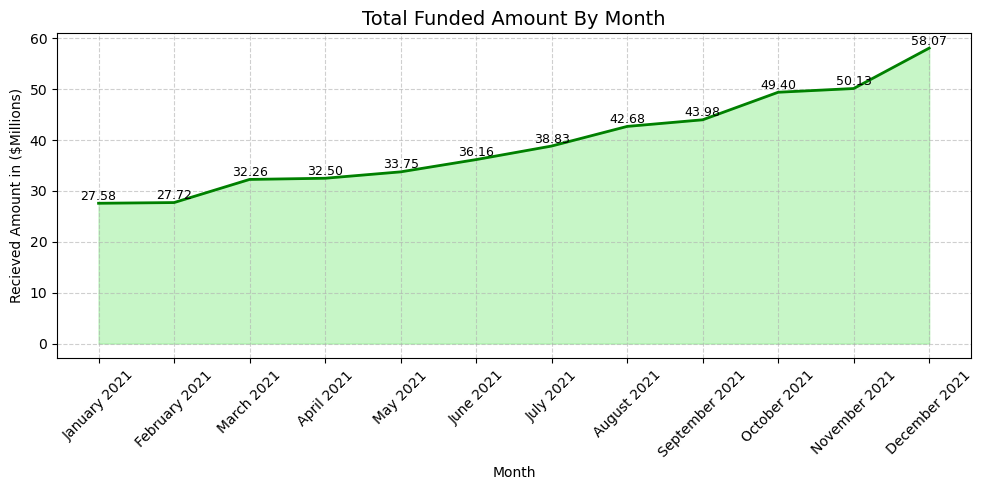

In [60]:
monthly_recieved=(df.sort_values('issue_date').assign (month_name=lambda x:x['issue_date'].dt.strftime('%B %Y')) .groupby('month_name',sort=False)['total_payment'].sum().div(1000000).reset_index(name='recieved_amount_millions'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_recieved['month_name'],monthly_recieved['recieved_amount_millions'],color='lightgreen',alpha=0.5)
plt.plot(monthly_recieved['month_name'],monthly_recieved['recieved_amount_millions'],color='green',linewidth=2)
for i,row in monthly_recieved.iterrows():
     plt.text(i,row['recieved_amount_millions']+0.1,f"{row['recieved_amount_millions']:.2f}", ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total Funded Amount By Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Recieved Amount in ($Millions)')
plt.xticks(ticks=range(len(monthly_recieved)),labels=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle= '--' ,alpha= 0.6)
plt.tight_layout()
plt.show()

### Monthly Trends By Issue Date By Loan Applications

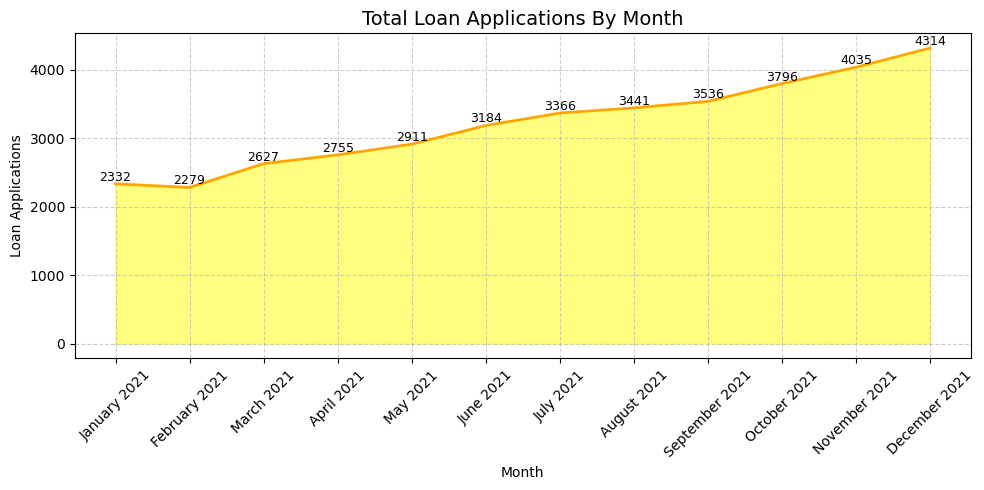

In [64]:
loan_applications1=(df.sort_values('issue_date').assign (month_name=lambda x:x['issue_date'].dt.strftime('%B %Y')) .groupby('month_name',sort=False)['id'].count().reset_index(name='loan_applications'))

plt.figure(figsize=(10,5))
plt.fill_between(loan_applications1['month_name'],loan_applications['loan_applications'],color='yellow',alpha=0.5)
plt.plot(loan_applications1['month_name'],loan_applications1['loan_applications'],color='orange',linewidth=2)
for i,row in loan_applications.iterrows():
     plt.text(i,row['loan_applications']+0.1,f"{row['loan_applications']}", ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total Loan Applications By Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Loan Applications')
plt.xticks(ticks=range(len(loan_applications1)),labels=loan_applications1['month_name'],rotation=45)
plt.grid(True,linestyle= '--' ,alpha= 0.6)
plt.tight_layout()
plt.show()

### Regional Analysis By State By Total Funded Amount

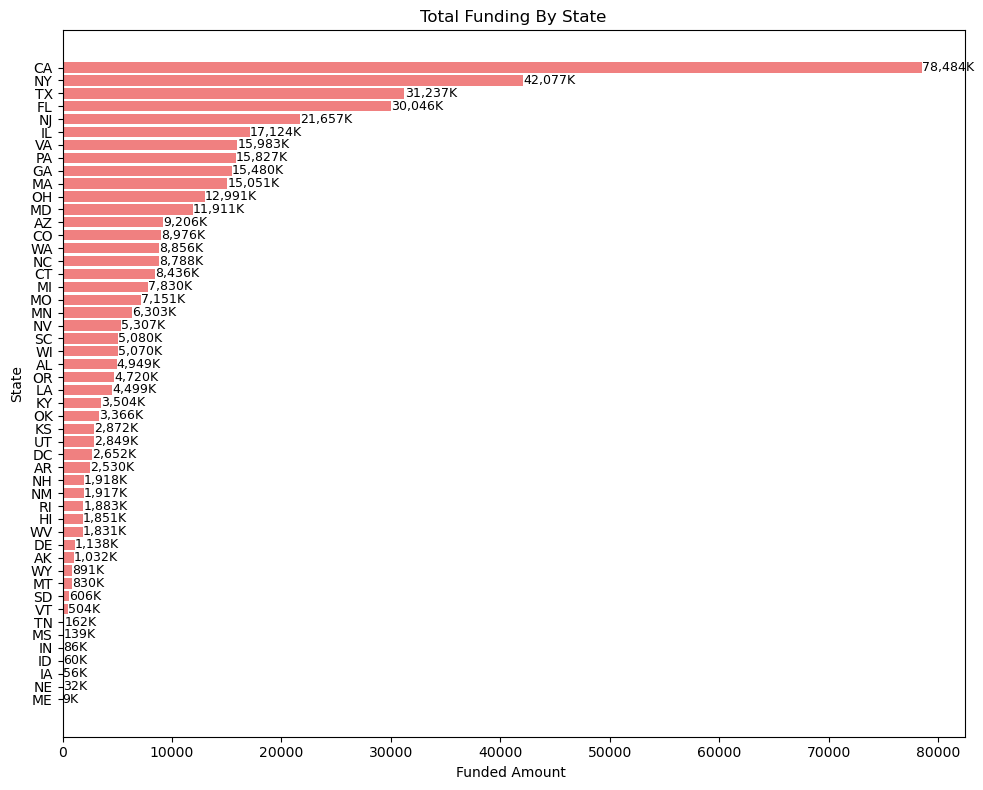

In [67]:
state_funding=df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_th=(state_funding)/1000
plt.figure(figsize=(10,8))
bars=plt.barh(state_funding_th.index,state_funding_th.values,color='lightcoral')
for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,f'{width:,.0f}K',va='center',fontsize=9)
plt.title('Total Funding By State')
plt.xlabel('Funded Amount ')
plt.ylabel('State')
plt.tight_layout()
plt.show()


    

### Regional Analysis By State By Amount Recieved

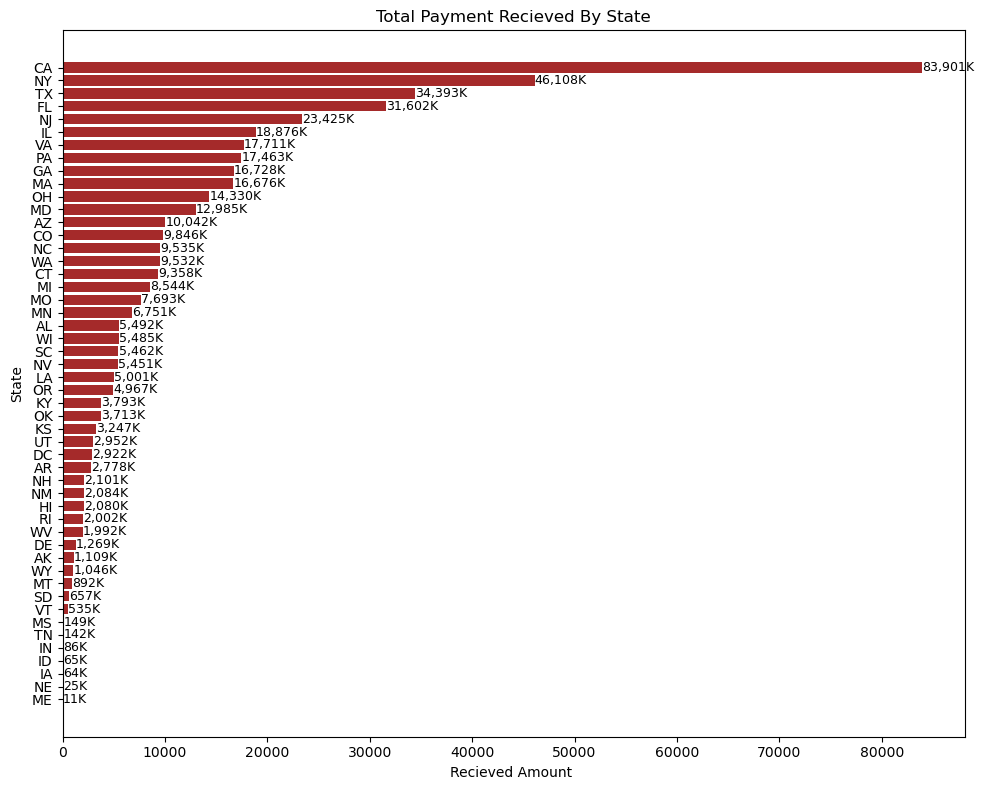

In [73]:
state_payment=df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_payment_th=(state_payment)/1000
plt.figure(figsize=(10,8))
bars=plt.barh(state_payment_th.index,state_payment_th.values,color='brown')
for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,f'{width:,.0f}K',va='center',fontsize=9)
plt.title('Total Payment Recieved By State')
plt.xlabel('Recieved Amount ')
plt.ylabel('State')
plt.tight_layout()
plt.show()


    

### Loan Term Analysis By Funded Amount

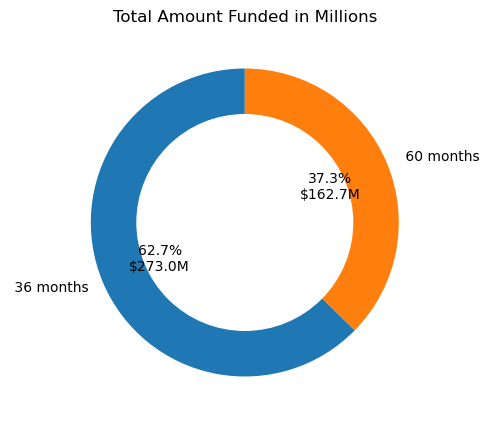

In [78]:
term_funding_millions=df.groupby('term')['loan_amount'].sum()/1000000
plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,labels= term_funding_millions.index,autopct=lambda p:f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",startangle=90,wedgeprops={'width':0.4})
plt.gca().add_artist(plt.Circle((0,0),0.70, color='white'))
plt.title('Total Amount Funded in Millions')
plt.show()

### Loan Term Analysis Total Amount Recieved

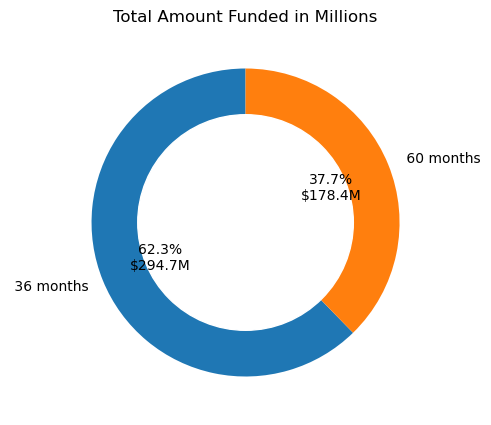

In [79]:
term_payment_millions=df.groupby('term')['total_payment'].sum()/1000000
plt.figure(figsize=(5,5))
plt.pie(
    term_payment_millions,labels= term_payment_millions.index,autopct=lambda p:f"{p:.1f}%\n${p*sum(term_payment_millions)/100:.1f}M",startangle=90,wedgeprops={'width':0.4})
plt.gca().add_artist(plt.Circle((0,0),0.70, color='white'))
plt.title('Total Amount Funded in Millions')
plt.show()

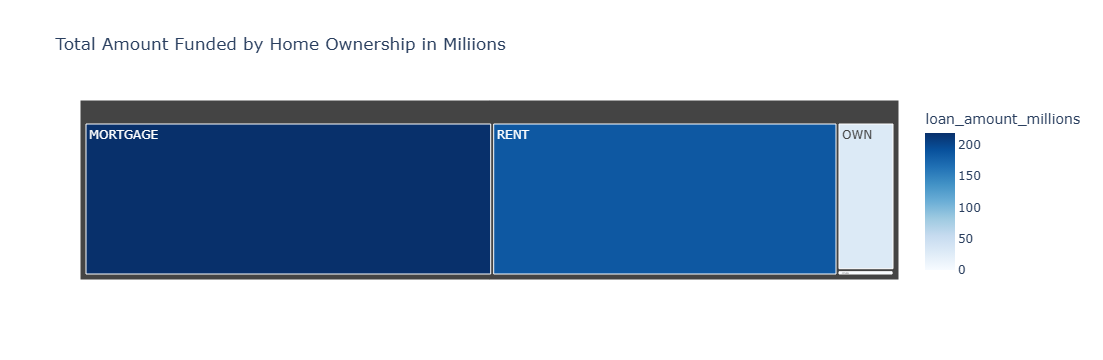

In [83]:
home_funding=df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']=home_funding['loan_amount']/1000000
fig=px.treemap(
    home_funding,path=['home_ownership'],values='loan_amount_millions',color='loan_amount_millions',color_continuous_scale='Blues',title='Total Amount Funded by Home Ownership in Miliions')
fig.show()


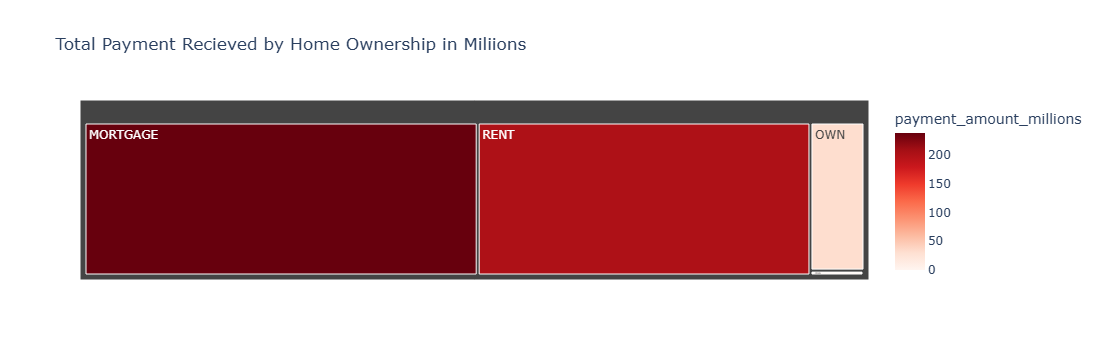

In [82]:
home_funding=df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_funding['payment_amount_millions']=home_funding['total_payment']/1000000
fig=px.treemap(
    home_funding,path=['home_ownership'],values='payment_amount_millions',color='payment_amount_millions',color_continuous_scale='Reds',title='Total Payment Recieved by Home Ownership in Miliions')
fig.show()
